In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#list of tv show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash", "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

# make iterative requests to TVmaze search endpoint
base_url = "http://api.tvmaze.com/search/shows?q="
titles = []
ratings = []
networks = []

url = base_url + "Altered Carbom"
show_json = requests.get(url).json()
print(json.dumps(show_json, indent=2, sort_keys=True))

[
  {
    "score": 8.230331,
    "show": {
      "_links": {
        "previousepisode": {
          "href": "http://api.tvmaze.com/episodes/1389603"
        },
        "self": {
          "href": "http://api.tvmaze.com/shows/12036"
        }
      },
      "externals": {
        "imdb": "tt2261227",
        "thetvdb": 332331,
        "tvrage": null
      },
      "genres": [
        "Drama",
        "Crime",
        "Science-Fiction"
      ],
      "id": 12036,
      "image": {
        "medium": "http://static.tvmaze.com/uploads/images/medium_portrait/143/358572.jpg",
        "original": "http://static.tvmaze.com/uploads/images/original_untouched/143/358572.jpg"
      },
      "language": "English",
      "name": "Altered Carbon",
      "network": null,
      "officialSite": "https://www.netflix.com/title/80097140",
      "premiered": "2018-02-02",
      "rating": {
        "average": 8.4
      },
      "runtime": 60,
      "schedule": {
        "days": [
          "Friday"
        ],


In [21]:
# loop through shows

for show in tv_shows:
    url = base_url + show
    response = requests.get(url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])
    # networks.append(response[0]['show']['network'])
    networks.append(response[0]['show']['webchannel']['name'])
print(networks)

KeyError: 'webchannel'

In [10]:
# create dataframe
shows_df = pd.DataFrame({
    "Title": titles,
    "Rating": ratings,
    "Network": networks
})

shows_df

ValueError: arrays must all be same length

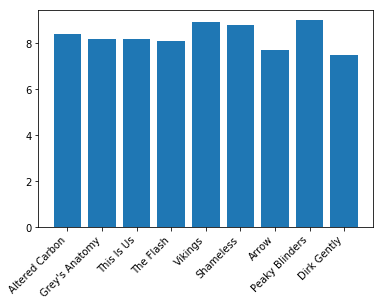

In [6]:
# create a list of numbers for x values
tick_locations = np.arange(len(shows_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, shows_df['rating'], align="center")
plt.xticks(tick_locations, shows_df['title'], rotation=45, ha="right")

plt.savefig("tv_show_ratings.png")
plt.show()
